In [7]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Tensorflow
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Input

In [8]:
df = pd.read_csv('data/WSN-DS.csv')

In [9]:
df.head()

,id,Time,Is_CH,who CH,Dist_To_CH,ADV_S,ADV_R,JOIN_S,JOIN_R,SCH_S,SCH_R,Rank,DATA_S,DATA_R,Data_Sent_To_BS,dist_CH_To_BS,send_code,Expaned Energy,Attack type
0,101000,50,1,101000,0.00000,1,0,0,25,1,0,0,0,1200,48,130.08535,0,2.46940,Normal
1,101001,50,0,101044,75.32345,0,4,1,0,0,1,2,38,0,0,0.00000,4,0.06957,Normal
2,101002,50,0,101010,46.95453,0,4,1,0,0,1,19,41,0,0,0.00000,3,0.06898,Normal
3,101003,50,0,101044,64.85231,0,4,1,0,0,1,16,38,0,0,0.00000,4,0.06673,Normal
4,101004,50,0,101010,4.83341,0,4,1,0,0,1,25,41,0,0,0.00000,3,0.06534,Normal


In [10]:
df.describe()

,id,Time,Is_CH,who CH,Dist_To_CH,ADV_S,ADV_R,JOIN_S,JOIN_R,SCH_S,SCH_R,Rank,DATA_S,DATA_R,Data_Sent_To_BS,dist_CH_To_BS,send_code,Expaned Energy
count,3.746610e+05,374661.000000,374661.000000,3.746610e+05,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000,374661.000000
mean,2.749693e+05,1064.748712,0.115766,2.749804e+05,22.599380,0.267698,6.940562,0.779905,0.737493,0.288984,0.747452,9.687104,44.857925,73.890045,4.569448,22.562735,2.497957,0.305661
std,3.898986e+05,899.646164,0.319945,3.899112e+05,21.955794,2.061148,7.044319,0.414311,4.691498,2.754746,0.434475,14.681901,42.574464,230.246335,19.679155,50.261604,2.407337,0.669462
min,1.010000e+05,50.000000,0.000000,1.010000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.070930e+05,353.000000,0.000000,1.070960e+05,4.735440,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,13.000000,0.000000,0.000000,0.000000,1.000000,0.056150
50%,1.160710e+05,803.000000,0.000000,1.160720e+05,18.372610,0.000000,5.000000,1.000000,0.000000,0.000000,1.000000,3.000000,35.000000,0.000000,0.000000,0.000000,2.000000,0.097970
75%,2.150720e+05,1503.000000,0.000000,2.150730e+05,33.776000,0.000000,7.000000,1.000000,0.000000,0.000000,1.000000,13.000000,62.000000,0.000000,0.000000,0.000000,4.000000,0.217760
max,3.402096e+06,3600.000000,1.000000,3.402100e+06,214.274620,97.000000,117.000000,1.000000,124.000000,99.000000,1.000000,99.000000,241.000000,1496.000000,241.000000,201.934940,15.000000,45.093940


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374661 entries, 0 to 374660
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0    id               374661 non-null  int64  
 1    Time             374661 non-null  int64  
 2    Is_CH            374661 non-null  int64  
 3    who CH           374661 non-null  int64  
 4    Dist_To_CH       374661 non-null  float64
 5    ADV_S            374661 non-null  int64  
 6    ADV_R            374661 non-null  int64  
 7    JOIN_S           374661 non-null  int64  
 8    JOIN_R           374661 non-null  int64  
 9    SCH_S            374661 non-null  int64  
 10   SCH_R            374661 non-null  int64  
 11  Rank              374661 non-null  int64  
 12   DATA_S           374661 non-null  int64  
 13   DATA_R           374661 non-null  int64  
 14   Data_Sent_To_BS  374661 non-null  int64  
 15   dist_CH_To_BS    374661 non-null  float64
 16   send_code        37

In [12]:
df.isnull().sum()

 id                 0
 Time               0
 Is_CH              0
 who CH             0
 Dist_To_CH         0
 ADV_S              0
 ADV_R              0
 JOIN_S             0
 JOIN_R             0
 SCH_S              0
 SCH_R              0
Rank                0
 DATA_S             0
 DATA_R             0
 Data_Sent_To_BS    0
 dist_CH_To_BS      0
 send_code          0
Expaned Energy      0
Attack type         0
dtype: int64

### Checking class distribution of the 'Attack type' column

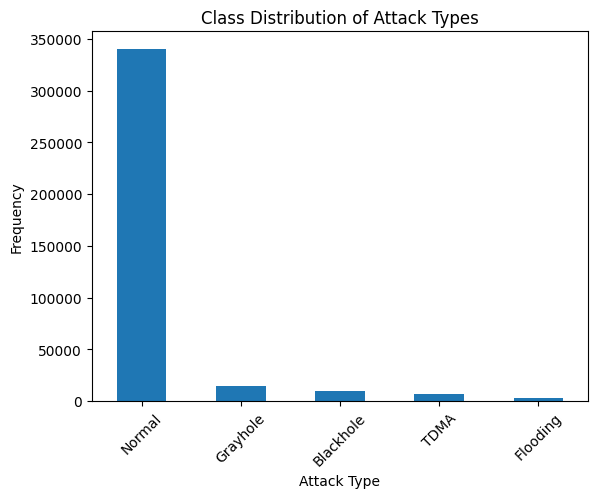

In [13]:
df['Attack type'].value_counts().plot(kind='bar')
plt.title('Class Distribution of Attack Types')
plt.xlabel('Attack Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [14]:
attack_type_counts = df['Attack type'].value_counts()
print(attack_type_counts)

Attack type
Normal       340066
Grayhole      14596
Blackhole     10049
TDMA           6638
Flooding       3312
Name: count, dtype: int64


## Ensemble Learning Model with Weighted Class Loss
Train an ensemble model (Random Forest) on the WSN-DS dataset. To address class imbalance, will use class weights in the loss function so that minority classes are not ignored during training.

In [15]:
# Preprocessing: Encode categorical variables, split features/labels, and train/test split

# Encode 'Attack type' as target
le = LabelEncoder()
df['Attack type Encoded'] = le.fit_transform(df['Attack type'])

# Select features (drop non-feature columns)
X = df.drop(['Attack type', 'Attack type Encoded'], axis=1, errors='ignore')
y = df['Attack type Encoded']

# If there are any non-numeric columns, encode them
def encode_non_numeric(X):
    for col in X.columns:
        if X[col].dtype == 'object':
            X[col] = LabelEncoder().fit_transform(X[col])
    return X
X = encode_non_numeric(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [16]:
# Compute class weights for the ensemble model

class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = {i : w for i, w in enumerate(class_weights)}
print('Class weights:', class_weight_dict)

Class weights: {0: np.float64(7.456847866650081), 1: np.float64(22.62098113207547), 2: np.float64(5.133647340926608), 3: np.float64(0.22034611030244217), 4: np.float64(11.28919020715631)}


In [17]:
# Train an ensemble model (RandomForestClassifier) with class weights

rf = RandomForestClassifier(class_weight=class_weight_dict, n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

In [18]:
# Evaluate the ensemble model

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy: 0.9971441154097661
Confusion Matrix:
 [[ 2004     0     6     0     0]
 [    0   655     0     7     0]
 [   16     0  2885    18     0]
 [    2    43    23 67939     7]
 [    0     0     0    92  1236]]
Classification Report:
               precision    recall  f1-score   support

   Blackhole       0.99      1.00      0.99      2010
    Flooding       0.94      0.99      0.96       662
    Grayhole       0.99      0.99      0.99      2919
      Normal       1.00      1.00      1.00     68014
        TDMA       0.99      0.93      0.96      1328

    accuracy                           1.00     74933
   macro avg       0.98      0.98      0.98     74933
weighted avg       1.00      1.00      1.00     74933



In [19]:
# Predict on the entire dataset
full_pred = rf.predict(X)

# Confusion matrix
cm = confusion_matrix(y, full_pred)
classes = le.classes_

# Initialize metrics storage
results = []
for i, class_name in enumerate(classes):
    TP = cm[i, i]
    FN = cm[i, :].sum() - TP
    FP = cm[:, i].sum() - TP
    TN = cm.sum() - (TP + FP + FN)
    TPR = TP / (TP + FN) if (TP + FN) > 0 else 0  # Recall
    FPR = FP / (FP + TN) if (FP + TN) > 0 else 0
    FNR = FN / (TP + FN) if (TP + FN) > 0 else 0
    TNR = TN / (TN + FP) if (TN + FP) > 0 else 0
    Precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    Accuracy = (TP + TN) / cm.sum() if cm.sum() > 0 else 0
    results.append({
        'Attack Type': class_name,
        'TPR (Recall)': TPR,
        'FPR': FPR,
        'FNR': FNR,
        'TNR': TNR,
        'Precision': Precision,
        'Accuracy': Accuracy
    })

results_df = pd.DataFrame(results)
display(results_df)

,Attack Type,TPR (Recall),FPR,FNR,TNR,Precision,Accuracy
0,Blackhole,0.999403,0.000049,0.000597,0.999951,0.998211,0.999936
1,Flooding,0.997886,0.000116,0.002114,0.999884,0.987157,0.999867
2,Grayhole,0.997671,0.000081,0.002329,0.999919,0.998012,0.999832
3,Normal,0.999771,0.003411,0.000229,0.996589,0.999653,0.999477
4,TDMA,0.985990,0.000027,0.014010,0.999973,0.998474,0.999725


## Ensemble Neural Network with Focal Loss
We will train an ensemble of neural networks (bagging) using the focal loss function to address class imbalance. Each neural network will be trained on a bootstrap sample of the data, and their predictions will be averaged for the final result.

In [20]:
def focal_loss(gamma=2., alpha=.25):
    def focal_loss_fixed(y_true, y_pred):
        y_true = tf.cast(y_true, tf.int32)
        y_true = tf.one_hot(y_true, depth=y_pred.shape[-1])
        epsilon = K.epsilon()
        y_pred = K.clip(y_pred, epsilon, 1. - epsilon)
        cross_entropy = -y_true * K.log(y_pred)
        weight = alpha * K.pow(1 - y_pred, gamma)
        loss = weight * cross_entropy
        loss = K.sum(loss, axis=-1) 
        return loss
    return focal_loss_fixed

In [21]:
num_classes = len(np.unique(y))

class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y), y=y)
class_weight_dict = {i: w for i, w in enumerate(class_weights)}

n_estimators = 5
ensemble_preds = []

for i in range(n_estimators):
    X_boot, y_boot = resample(X, y, replace=True, random_state=42+i)
    model = Sequential([
        Input(shape=(X.shape[1],)),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss=focal_loss(gamma=2., alpha=.25),
                  metrics=['accuracy'])
    model.fit(X_boot, y_boot, epochs=15, batch_size=256, class_weight=class_weight_dict, verbose=0)
    ensemble_preds.append(model.predict(X))

ensemble_pred_proba = np.mean(ensemble_preds, axis=0)
ensemble_pred = np.argmax(ensemble_pred_proba, axis=1)

11709/11709 ━━━━━━━━━━━━━━━━━━━━ 2s 191us/step
11709/11709 ━━━━━━━━━━━━━━━━━━━━ 2s 192us/step
11709/11709 ━━━━━━━━━━━━━━━━━━━━ 2s 191us/step
11709/11709 ━━━━━━━━━━━━━━━━━━━━ 2s 188us/step
11709/11709 ━━━━━━━━━━━━━━━━━━━━ 2s 191us/step


In [22]:
# Evaluate the ensemble neural network with focal loss on the entire dataset
cm_ensemble = confusion_matrix(y, ensemble_pred)

results_ensemble = []
for i, class_name in enumerate(classes):
    TP = cm_ensemble[i, i]
    FN = cm_ensemble[i, :].sum() - TP
    FP = cm_ensemble[:, i].sum() - TP
    TN = cm_ensemble.sum() - (TP + FP + FN)
    TPR = TP / (TP + FN) if (TP + FN) > 0 else 0  # Recall
    FPR = FP / (FP + TN) if (FP + TN) > 0 else 0
    FNR = FN / (TP + FN) if (TP + FN) > 0 else 0
    TNR = TN / (TN + FP) if (TN + FP) > 0 else 0
    Precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    Accuracy = (TP + TN) / cm_ensemble.sum() if cm_ensemble.sum() > 0 else 0
    results_ensemble.append({
        'Attack Type': class_name,
        'TPR (Recall)': TPR,
        'FPR': FPR,
        'FNR': FNR,
        'TNR': TNR,
        'Precision': Precision,
        'Accuracy': Accuracy
    })

results_ensemble_df = pd.DataFrame(results_ensemble)
display(results_ensemble_df)
results_ensemble_df

,Attack Type,TPR (Recall),FPR,FNR,TNR,Precision,Accuracy
0,Blackhole,0.0,0.0,1.0,1.0,0.000000,0.973178
1,Flooding,0.0,0.0,1.0,1.0,0.000000,0.991160
2,Grayhole,0.0,0.0,1.0,1.0,0.000000,0.961042
3,Normal,1.0,1.0,0.0,0.0,0.907663,0.907663
4,TDMA,0.0,0.0,1.0,1.0,0.000000,0.982283


,Attack Type,TPR (Recall),FPR,FNR,TNR,Precision,Accuracy
0,Blackhole,0.0,0.0,1.0,1.0,0.000000,0.973178
1,Flooding,0.0,0.0,1.0,1.0,0.000000,0.991160
2,Grayhole,0.0,0.0,1.0,1.0,0.000000,0.961042
3,Normal,1.0,1.0,0.0,0.0,0.907663,0.907663
4,TDMA,0.0,0.0,1.0,1.0,0.000000,0.982283


## Improved Ensemble Neural Network with Focal Loss
- Feature scaling (StandardScaler)
- Increased alpha in focal loss to 0.75
- Lowered learning rate to 0.0005
- Increased epochs to 40

In [23]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [24]:
# Improved ensemble neural network training with focal loss and feature scaling
num_classes = len(np.unique(y))

class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y), y=y)
class_weight_dict = {i: w for i, w in enumerate(class_weights)}

n_estimators = 5
ensemble_preds = []

for i in range(n_estimators):
    X_boot, y_boot = resample(X_scaled, y, replace=True, random_state=42+i)
    model = Sequential([
        Input(shape=(X_scaled.shape[1],)),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=0.0005),
                  loss=focal_loss(gamma=2., alpha=0.75),
                  metrics=['accuracy'])
    model.fit(X_boot, y_boot, epochs=40, batch_size=256, class_weight=class_weight_dict, verbose=1)
    ensemble_preds.append(model.predict(X_scaled))

ensemble_pred_proba = np.mean(ensemble_preds, axis=0)
ensemble_pred = np.argmax(ensemble_pred_proba, axis=1)

Epoch 1/40
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8575 - loss: 0.2432
Epoch 2/40
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9073 - loss: 0.1782
Epoch 3/40
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9070 - loss: 0.1769
Epoch 4/40
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9085 - loss: 0.1684
Epoch 5/40
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9066 - loss: 0.1737
Epoch 6/40
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9066 - loss: 0.1738
Epoch 7/40
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9080 - loss: 0.1683
Epoch 8/40
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9078 - loss: 0.1684
Epoch 9/40
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9074 - loss: 0.1713
Epoch 10/40
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9071 - loss: 0.1704
Epoch 11/40
1464/1464 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9075 - loss: 0.1702
Epoch 12/40
1464/1464 ━━━━━━━━

In [25]:
cm_ensemble = confusion_matrix(y, ensemble_pred)

results_ensemble = []
for i, class_name in enumerate(classes):
    TP = cm_ensemble[i, i]
    FN = cm_ensemble[i, :].sum() - TP
    FP = cm_ensemble[:, i].sum() - TP
    TN = cm_ensemble.sum() - (TP + FP + FN)
    TPR = TP / (TP + FN) if (TP + FN) > 0 else 0  # Recall
    FPR = FP / (FP + TN) if (FP + TN) > 0 else 0
    FNR = FN / (TP + FN) if (TP + FN) > 0 else 0
    TNR = TN / (TN + FP) if (TN + FP) > 0 else 0
    Precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    Accuracy = (TP + TN) / cm_ensemble.sum() if cm_ensemble.sum() > 0 else 0
    results_ensemble.append({
        'Attack Type': class_name,
        'TPR (Recall)': TPR,
        'FPR': FPR,
        'FNR': FNR,
        'TNR': TNR,
        'Precision': Precision,
        'Accuracy': Accuracy
    })

results_ensemble_df = pd.DataFrame(results_ensemble)
display(results_ensemble_df)
results_ensemble_df

,Attack Type,TPR (Recall),FPR,FNR,TNR,Precision,Accuracy
0,Blackhole,0.0,0.0,1.0,1.0,0.000000,0.973178
1,Flooding,0.0,0.0,1.0,1.0,0.000000,0.991160
2,Grayhole,0.0,0.0,1.0,1.0,0.000000,0.961042
3,Normal,1.0,1.0,0.0,0.0,0.907663,0.907663
4,TDMA,0.0,0.0,1.0,1.0,0.000000,0.982283


,Attack Type,TPR (Recall),FPR,FNR,TNR,Precision,Accuracy
0,Blackhole,0.0,0.0,1.0,1.0,0.000000,0.973178
1,Flooding,0.0,0.0,1.0,1.0,0.000000,0.991160
2,Grayhole,0.0,0.0,1.0,1.0,0.000000,0.961042
3,Normal,1.0,1.0,0.0,0.0,0.907663,0.907663
4,TDMA,0.0,0.0,1.0,1.0,0.000000,0.982283
